In [1]:
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


ada beberapa function yang berperan di sini:

apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
Function strftime digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada.

In [2]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


Penambahan Kolom GMV pada Dataset
Selanjutnya, bagaimana dengan GMV? Definisikan GMV adalah perkalian setiap entri di kolom item_price dan kolom quantity. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [3]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


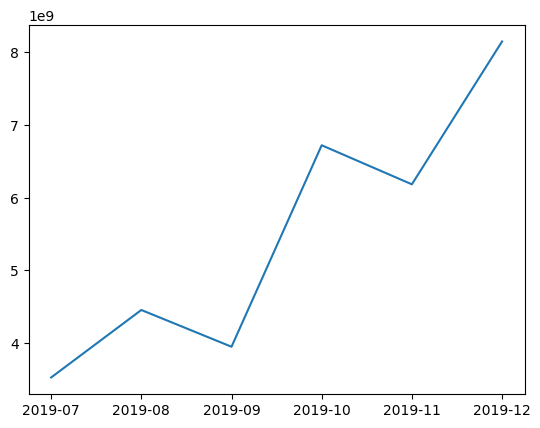

In [5]:
import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function plt.plot lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom order_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show() untuk menampilkan grafiknya.

In [7]:
dataset.groupby(['order_month'])['gmv'].sum().plot
plt.show()

Cara Alternatif: Fungsi .plot() pada pandas Dataframe
Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru.

Anatomi dari Figure

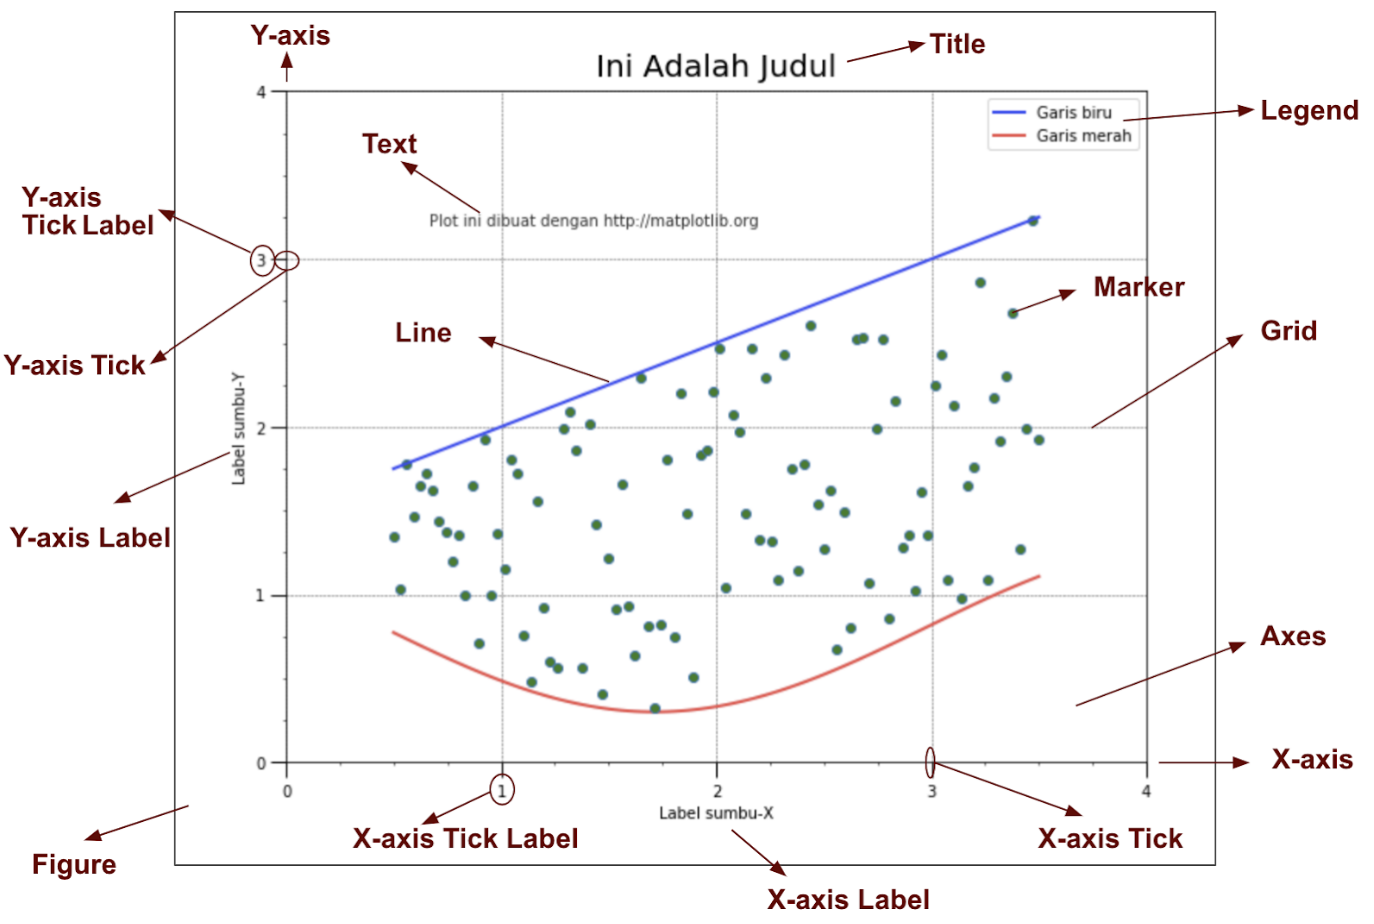

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes.
Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
Axis Label: Nama dari sumbu yang ditampilkan.
Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot/histogram).
Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.

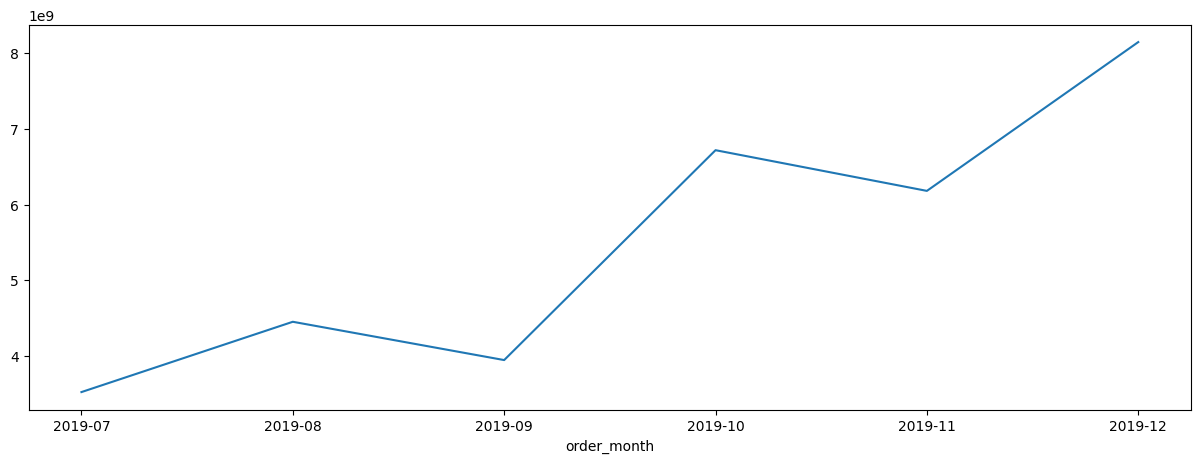

In [8]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

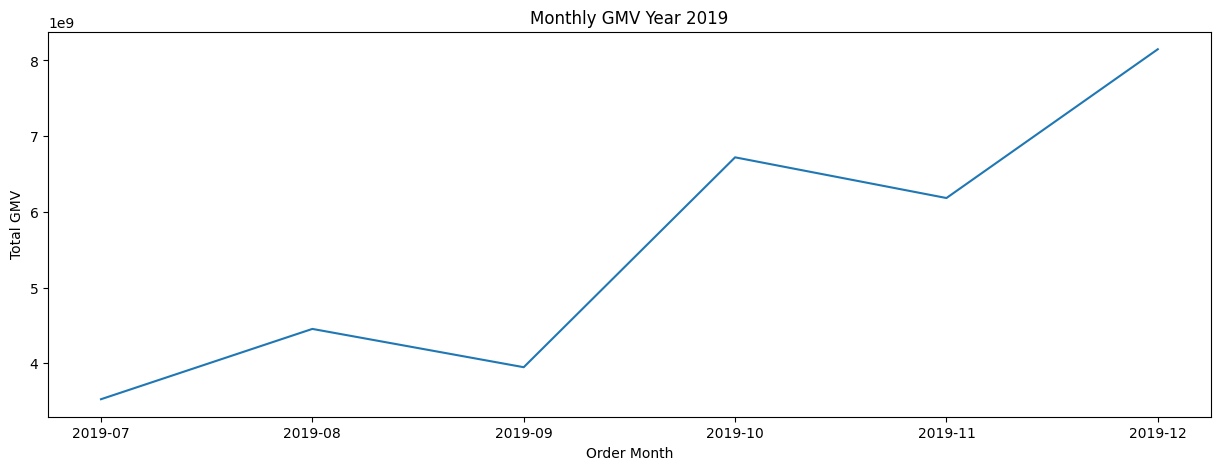

In [9]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

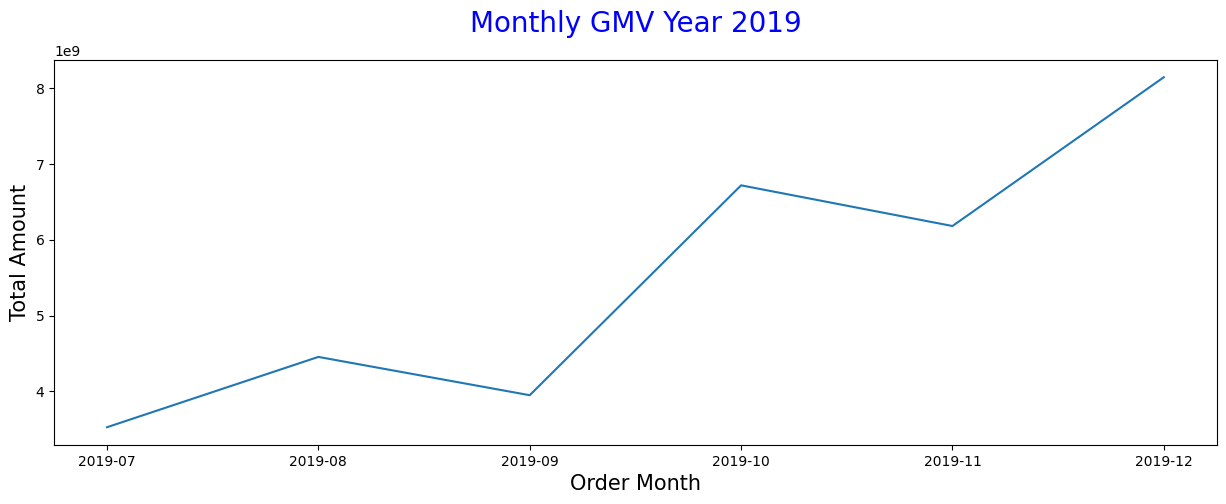

In [10]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Kustomisasi Title and Axis Labels
“Itu kan untuk menambahkan, lalu bagaimana caranya untuk kustomisasi, Nja?” tanyaku antusias.

“Kita bisa melakukan berbagai modifikasi dengan menambahkan parameter ke dalam function-nya. Begini yah, saya kasih contoh,” aku paling suka kalau Senja sudah mulai memberi contoh-contoh. Jadi semakin jelas dan mudah dimengerti.

Misalnya, untuk judul/title, parameter yang bisa ditambahkan:

loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka default-nya title ada di tengah.
pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.
Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.

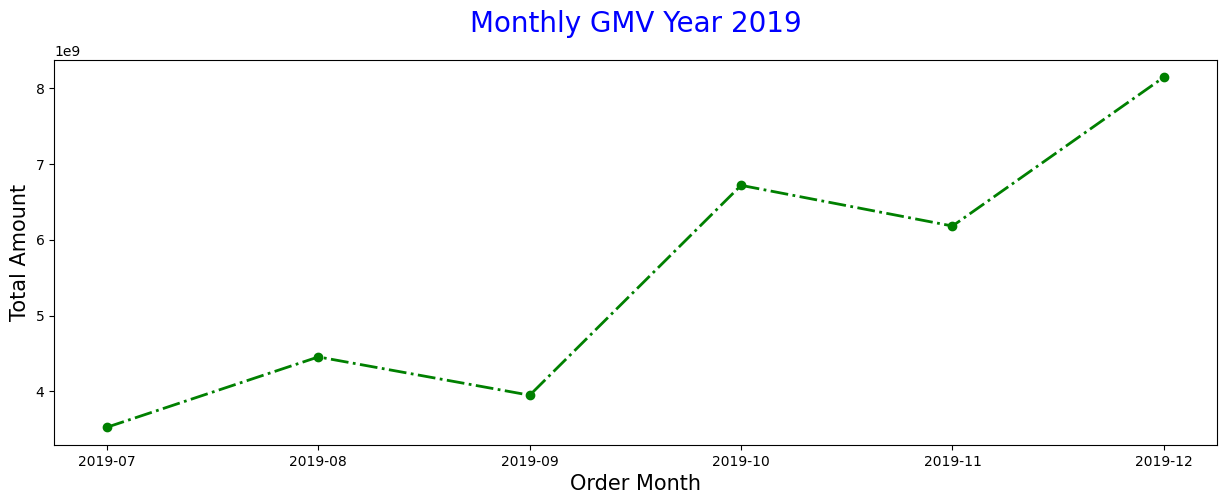

In [11]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Kustomisasi Line dan Point
“Ini garis charts-nya enggak harus warna standar kok, Aksara. Bisa kamu ganti, tahu kan caranya?” komentar Senja saat melihat charts yang kutampilkan.

“Oke, biar lebih menarik juga ya. Caranya seperti ini bukan?” Aku menunjukkan cara dan detailnya untuk memastikan:



Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

color: mengubah warnanya (sama seperti di title)
linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

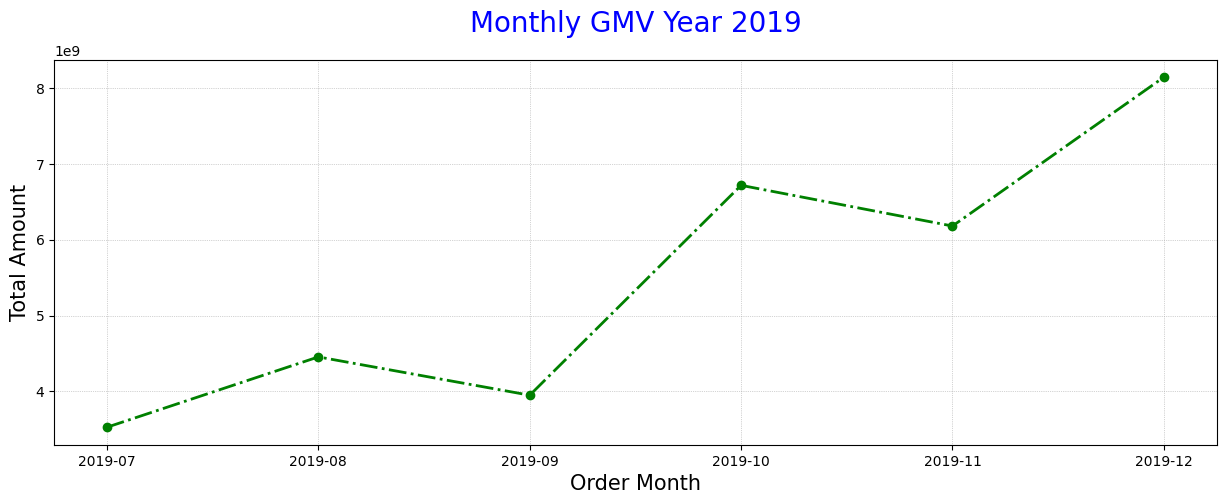

In [15]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

Kustomisasi Grid
“Nah, kamu sudah paham soal mengubah warna garis chart. Ini saya mau kasih tahu kamu soal kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan grid. Sini saya jelaskan,” lanjut Senja. Aku diam memperhatikan.

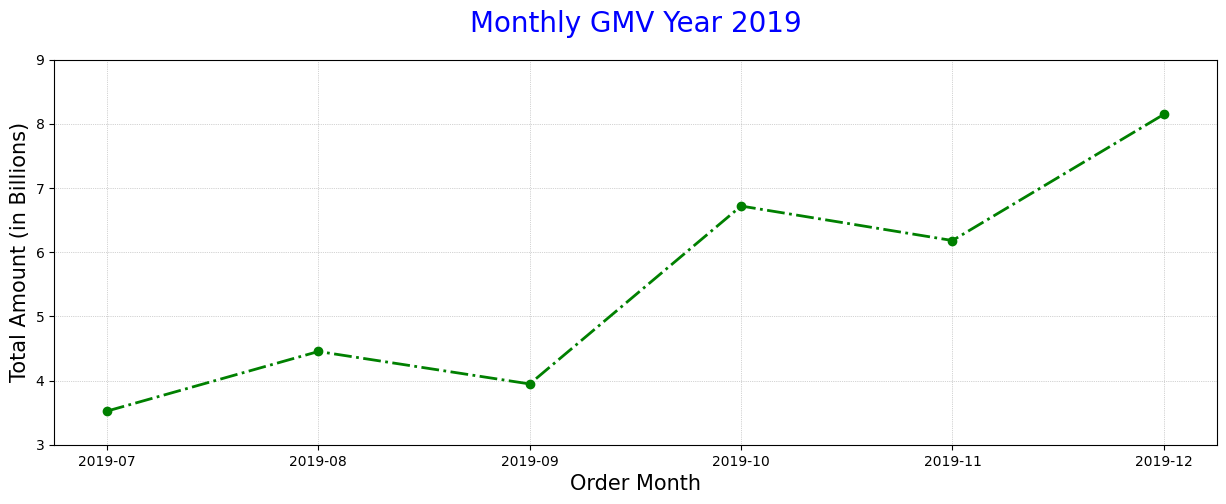

In [16]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Kustomisasi Axis Ticks
“Bagaimana, apakah sudah cukup grafiknya seperti ini, Nja?” tanyaku setelah melakukan praktik atas penjelasan-penjelasan Senja tadi.

“Sepertinya ada yang belum tepat. Ini titik-titik di sumbu y, nilainya masih aneh. 2.0, 2.5, 3.0 dsb lalu di atasnya 1e11. Kayaknya bisa dibuat lebih jelas lagi. Buat saja dalam bentuk miliar agar lebih mudah dipahami."



Aku pun mencoba saran dari Senja: Nilai-nilai di sumbu x dan y bisa diakses melalui function plt.xticks() dan plt.yticks().

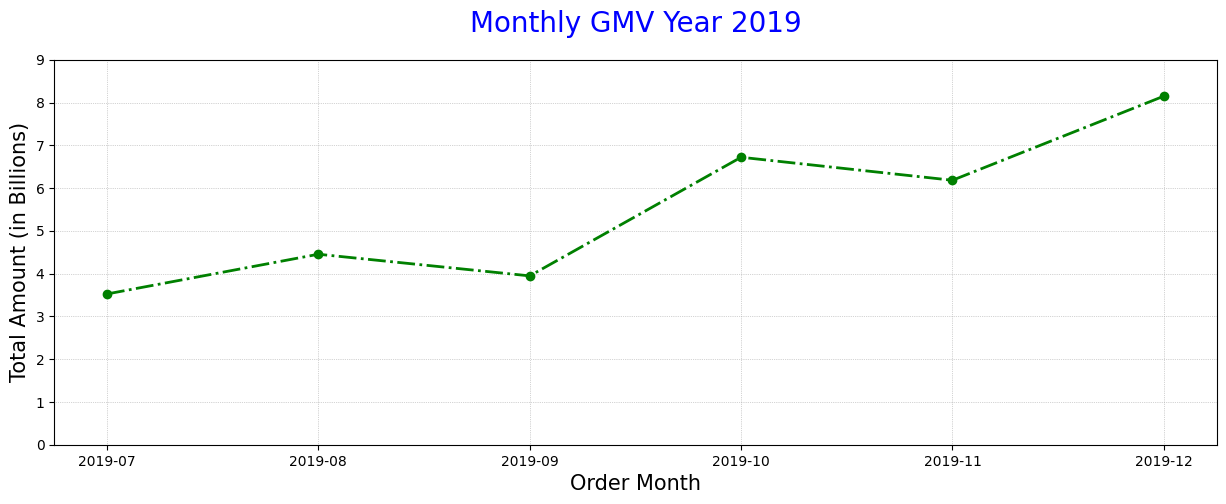

In [17]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Menentukan Batas Minimum dan Maksimum Axis Ticks
Aku pun kembali menyerahkan hasil kerjaku untuk ditinjau Senja sebelum kuberikan pada Andra. Tapi, ternyata masih ada kekurangan. Ia pun menulis sebuah catatan untuk ditempel di keyboard laptopku:

Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0)

uiz
Setelah kode ini dijalankan, apa isi dari variabel labels?

labels, locations = plt.yticks()
JAWABAN

List ticks labels di sumbu-y (Jawaban benar),
Label dari sumbu-y,
Banyaknya ticks label di sumbu-y,
Koordinat dari ticks labels di sumbu-y

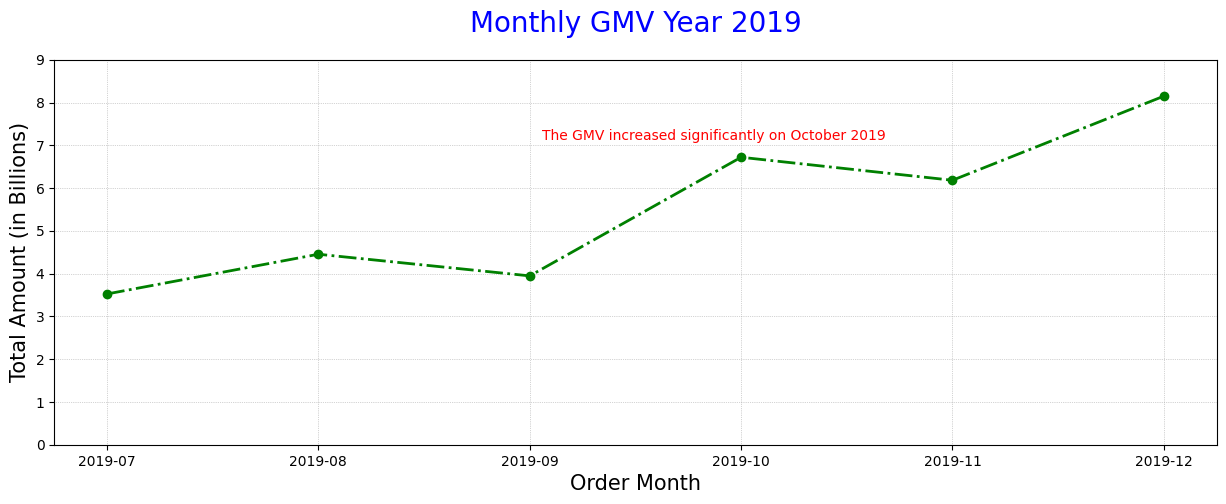

In [18]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

Menambahkan Informasi Pada Plot
“Berhubung grafiknya sudah jadi, Aksara. Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan insight dari grafik tersebut. Menurutmu?”

“Boleh juga. Bagusnya kita tambahkan insight apa ya?”



“Dilihat dari trend-nya, mulai bulan Oktober 2019, GMV kita naik drastis setelah sebelumnya stagnan di angka 200-300 miliar per bulan. Kita bisa mulai dengan menambahkan info ini di grafik. Caranya seperti ini,” jelas Senja.

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

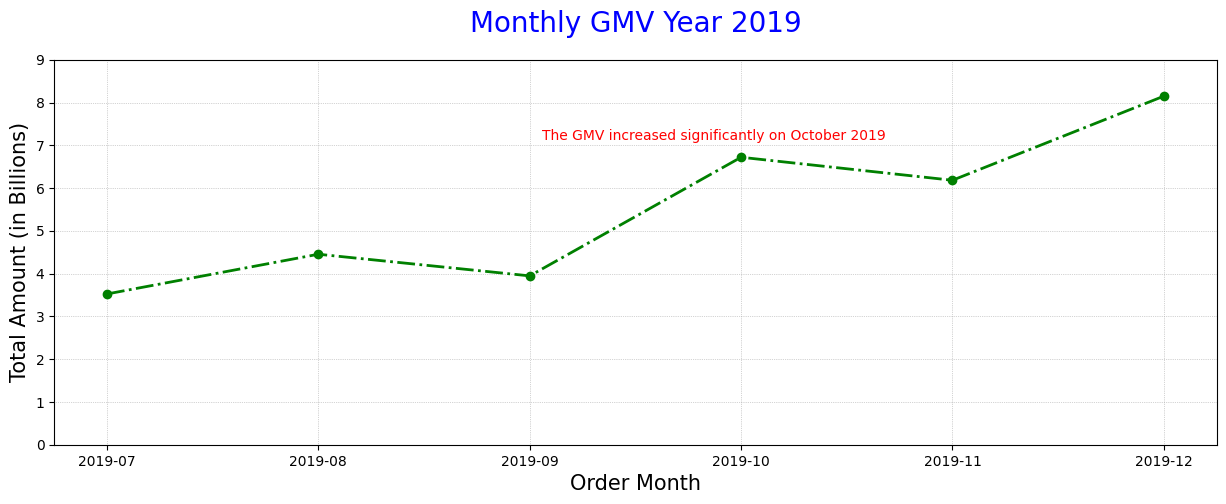

In [19]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

Menyimpan Hasil Plot Menjadi File Image
“Nja, ini sudah aku tambahkan informasi tadi. Dariku sih sudah siap kalau mau dibawa ke rapat atau dilaporkan ke Andra. Oh ya, ini aku mau simpan sebagai file gambar, gimana caranya ya?”

Aku menunggu jawaban Senja. Ia masih melihat-lihat susunan kode dan tampilan grafikku. “Oke, ini sudah layak untuk dipresentasikan. Untuk menyimpan sebagai file gambar, kalau mau cepat, bisa tinggal di-screenshoot saja. Tapi kalau ingin hasil yang bagus, ada trik tersendiri,” ujar Senja sengaja membuatku penasaran.



“Nih sini saya ajarkan. Kita bisa menyimpan sebagai file gambar dengan function savefig sebelum plt.show()

Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

plt.gcf().canvas.get_supported_filetypes()

In [20]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

TypeError: ignored

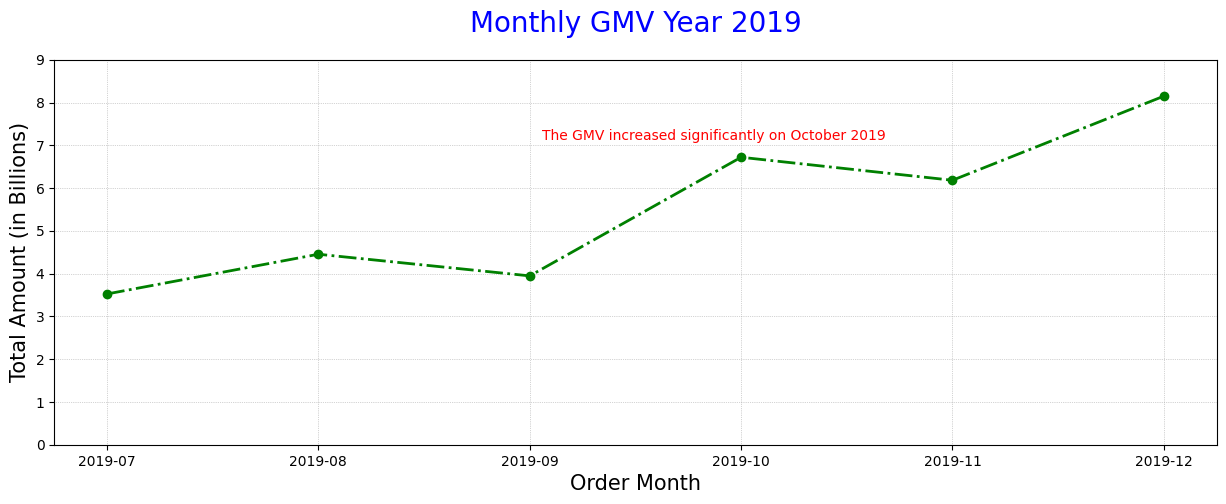

In [23]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv2.png', quality=95)
plt.show()

Pengaturan Parameter untuk Menyimpan Gambar
“Satu lagi, Aksara. Ini bisa kamu atur juga resolusinya agar hasil gambarnya lebih berkualitas. Ini kamu inget deh beberapa parameternya. Saya bikinkan note saja,” tambah Senja.



Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

dpi: Resolusi gambar (dots per inch).
quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
facecolor: Memberikan warna bagian depan figure, di luar area plot
edgecolor: Memberikan warna pinggiran gambar
transparent: Jika nilainya True, maka gambarnya jadi transparan (jika file-nya png)


Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

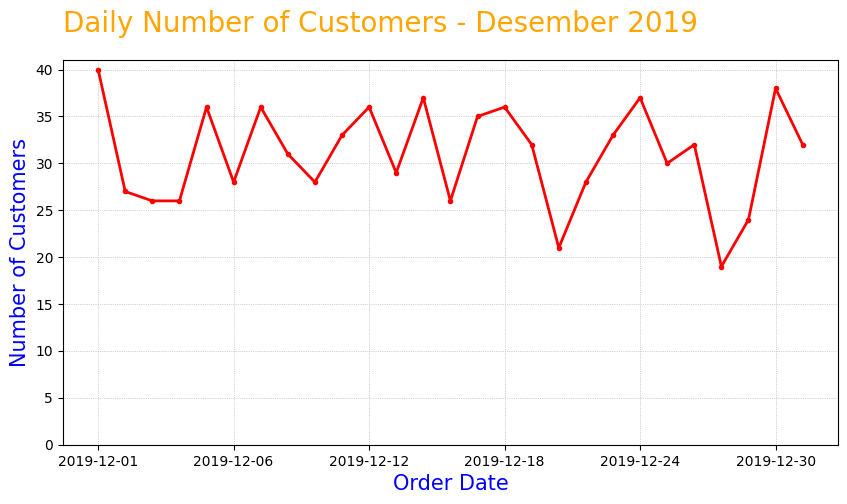

In [27]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - Desember 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

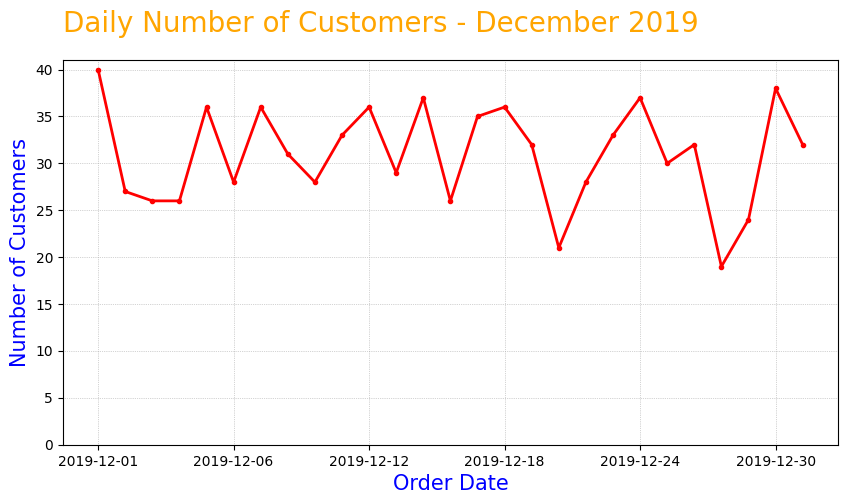

In [26]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()